# Project Coronavirus 
## Having a look into the situation amongst the Coronavirus in 5 specific countries
---------------

As part of the Data Science Bootcamp of The Bridge we are doing an Exploratory Data Analysis of the coronavirus in 5 specific countries: 
    - Spain
    - The Netherlands
    - Mexico
    - Iran
    - Brazil

To have a better understanding of the development of the virus in these countries and the comparison of this between all the countries we will be following the next steps:

1. Gathering the Data.
2. Api
3. Cleaning and filtering the data.
4. Studying and visualizing the data per country
5. Draw conclusions.


We will import the following libraries to use in our data analysis:

In [2]:
os.path.abspath('')
root_path = os.path.dirname(os.path.abspath(''))
sys.path.append(root_path)

import pandas as pd
import numpy as np
import os, sys
from flask import Flask, render_template, redirect, request, jsonify 
import missingno
import time
import random
import json
import seaborn as sns
import matplotlib.pyplot  as plt
from utils.apis_tb import dfjson

### 1. Importing data

We are importing the data in csv format from the following website: covid.ourworldindata.org. We are using the link instead of downloading the data as the data will be updated daily and we want the dataset to be up to date everytime we use it. 

In [3]:
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
data = pd.read_csv(url)
data.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


In [4]:
data.shape

(34243, 34)

As this dataset contains the data of all the countries we will start with filtering the dataset so we will only have the data relevant for our countries: Spain, The Netherlands, Mexico, Iran and Brazil:

In [5]:
Data_all_countries = data[(data.location == "Spain") | (data.location == "Iran") | (data.location == "Netherlands") | (data.location == "Mexico") | (data.location == "Brazil")] #Filtering our countries from dataset

### 2.API

As part of the project we will create a dataframe with the mean total cases of all our countries. We will send this dataframe in an Api to another group of our bootcamp. Here we will create the Json file that we will later use in the Api. Please find more information of the Api in in the file: Apis_tb.py.

In [6]:
#Creating the Json
dfjson(Data_all_countries)

'se ha cargado el archivo mean.json en el path'

In [ ]:
#TODO receive the json from other group and plot it. 

### 3. Cleaning the dataset

Now that we have the dataset with the information of only the necessary countries. We will further clean the data with by looking at the following things:

1.Check the types of the columns and changing the date column to a datetime64 type and setting it as our index.

2.Checking the data for any Nan values.

3.Checking for duplicates in the data.

4.Dropping irrelevant columns

First we will start checking the types and specifcally the type of the date column.

In [6]:
Data_all_countries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1079 entries, 4418 to 28938
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         1079 non-null   object 
 1   continent                        1079 non-null   object 
 2   location                         1079 non-null   object 
 3   date                             1079 non-null   object 
 4   total_cases                      1071 non-null   float64
 5   new_cases                        1071 non-null   float64
 6   total_deaths                     1071 non-null   float64
 7   new_deaths                       1071 non-null   float64
 8   total_cases_per_million          1071 non-null   float64
 9   new_cases_per_million            1071 non-null   float64
 10  total_deaths_per_million         1071 non-null   float64
 11  new_deaths_per_million           1071 non-null   float64
 12  new_tests       

In [7]:
#Changing date to datetime64 type and setting as index, saving the data in a new variable: data_covid which we will further continue to use.

Data_all_countries.date = pd.to_datetime(Data_all_countries.date) 
data_covid = Data_all_countries.set_index("date")
data_covid

,iso_code,continent,location,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
date,,,,,,,,,,,,,,,,,,,,,
2019-12-31,BRA,South America,Brazil,0.0,0.0,0.0,0.0,0.000,0.000,0.000,...,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88
2020-01-01,BRA,South America,Brazil,0.0,0.0,0.0,0.0,0.000,0.000,0.000,...,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88
2020-01-02,BRA,South America,Brazil,0.0,0.0,0.0,0.0,0.000,0.000,0.000,...,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88
2020-01-03,BRA,South America,Brazil,0.0,0.0,0.0,0.0,0.000,0.000,0.000,...,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88
2020-01-04,BRA,South America,Brazil,0.0,0.0,0.0,0.0,0.000,0.000,0.000,...,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-28,ESP,Europe,Spain,280610.0,1828.0,28436.0,2.0,6001.739,39.098,608.194,...,13.799,34272.360,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56
2020-07-29,ESP,Europe,Spain,282641.0,2031.0,28441.0,5.0,6045.178,43.439,608.301,...,13.799,34272.360,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56
2020-07-30,ESP,Europe,Spain,285430.0,2789.0,28443.0,2.0,6104.830,59.652,608.344,...,13.799,34272.360,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56


Now we will continue having a loon at the missing values.


Preview of data with null values:


,iso_code,continent,location,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
date,,,,,,,,,,,,,,,,,,,,,
2019-12-31,BRA,South America,Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
2020-01-01,BRA,South America,Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
2020-01-02,BRA,South America,Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88


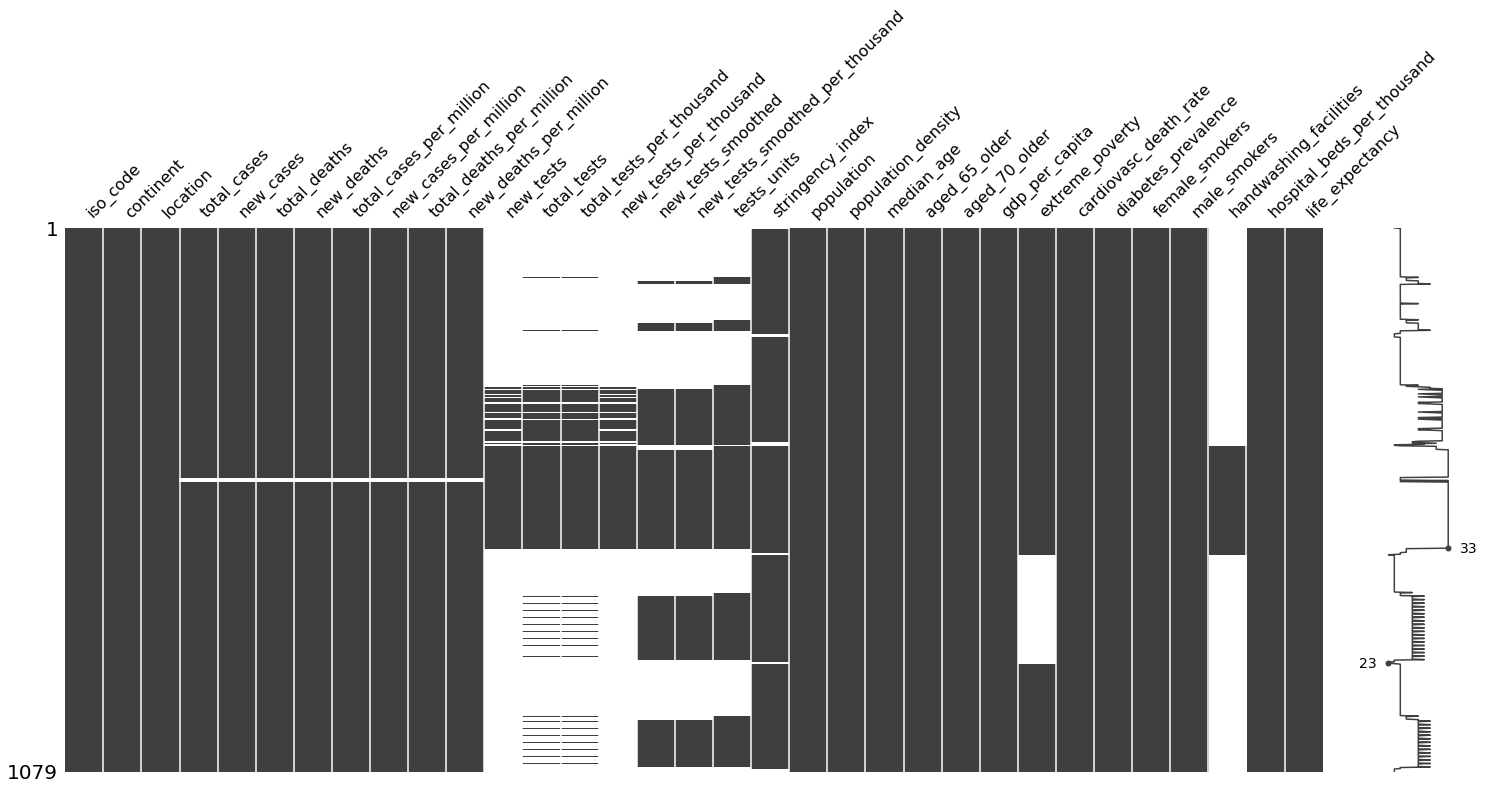

In [8]:
# generate preview of entries with null values. The white spaces demonstrate missing data.
if len(data_covid[data_covid.isnull().any(axis=1)] != 0):
    print("\nPreview of data with null values:")
    display(data_covid[data_covid.isnull().any(axis=1)].head(3))
    missingno.matrix(data_covid)
    plt.show()

As we can see from the previes above, there are quite some columns with missing data (NaN data). We have decided to remove all the columns regarding "test" as there is not enough information to actually draw conlusions. The same goes for the "stringecy_index", "extreme_poverty" and the "handwashing facilities column".

In [9]:
#Removing the columns with too many NaN values:
data_covid.drop(["new_tests", "total_tests", "total_tests_per_thousand", "new_tests_per_thousand", "tests_units", "new_tests_smoothed", "new_tests_smoothed_per_thousand", "stringency_index", "extreme_poverty", "handwashing_facilities"], axis=1, inplace=True)



Now that we have checked the missing values, we will continue with the duplicated values.

In [10]:
#generate count statistics of duplicate entries

if len(data_covid[data_covid.duplicated()]) > 0:
    print("\n***Number of duplicated entries: ", len(data_covid[data_covid.duplicated()]))
    display(data_covid[data_covid.duplicated(keep=False)].sort_values(by=list(data_covid.columns)).head())
else:
    print("\nNo duplicated entries found")


***Number of duplicated entries:  289


,iso_code,continent,location,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy
date,,,,,,,,,,,,,,,,,,,,,
2019-12-31,BRA,South America,Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,33.5,8.552,5.06,14103.452,177.961,8.11,10.1,17.9,2.2,75.88
2020-01-01,BRA,South America,Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,33.5,8.552,5.06,14103.452,177.961,8.11,10.1,17.9,2.2,75.88
2020-01-02,BRA,South America,Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,33.5,8.552,5.06,14103.452,177.961,8.11,10.1,17.9,2.2,75.88
2020-01-03,BRA,South America,Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,33.5,8.552,5.06,14103.452,177.961,8.11,10.1,17.9,2.2,75.88
2020-01-04,BRA,South America,Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,33.5,8.552,5.06,14103.452,177.961,8.11,10.1,17.9,2.2,75.88


We can see that there are quite some duplicated values. This was to be expected as already all the dates from last year of the cases will be 0 as the Corona virus then was not (as) active yet. We have decided to delete the duplicated values to clean the dataframe and have a clearer overview when visualizing the data.

In [11]:
#removing duplicated values. ## TODO maybe change this?? not sure if we want to remove all the duplicates?
data_covid.drop_duplicates(inplace=True)

Now that the dataset is already quite clean and ready to be used and analised, we will finally have a citical look at the columns within our dataset to see if we really need all of them. 

In [13]:
data_covid.columns

Index(['iso_code', 'continent', 'location', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'population', 'population_density',
       'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'hospital_beds_per_thousand', 'life_expectancy'],
      dtype='object')

As it is important to only delete the columns that we know for certain that do not have added value for our data study we will for now only remove: 'iso_code', 'continent', 'gdp_per_capita' and 'life_expectancy'.

In [14]:
#removing the columns that have irrelevant data for our study. # TODO have a look if we want to remove other columns as well. Depends on what we are actually analising.. hypothesis?
data_covid.drop(['iso_code', 'continent','gdp_per_capita','life_expectancy'], axis=1, inplace=True)

### 4. Studying and visualizing the data

First we will have a general overview of the data

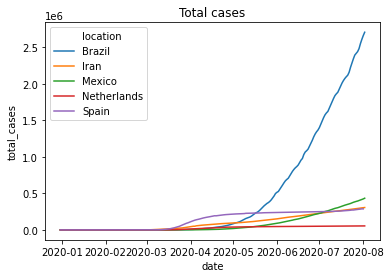

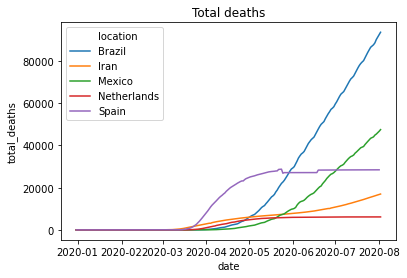

In [35]:
total_cases_all_countries = sns.lineplot(
    x=data_covid.index,
    y="total_cases",
    hue='location',
    data=data_covid
).set_title('Total cases')
plt.show()

total_deaths_all_countries = sns.lineplot(
    x=data_covid.index,
    y="total_deaths",
    hue='location',
    data=data_covid
).set_title('Total deaths')
plt.show()

In [15]:
data_covid_columns = data_covid[["location","total_cases", "total_deaths", "new_cases", "new_deaths"]] ## filtering the dataframe with the columns that we will need for question 7.A

In [26]:
data_covid_columns

,location,total_cases,total_deaths,new_cases,new_deaths
date,,,,,
2019-12-31,Brazil,0.0,0.0,0.0,0.0
2020-02-26,Brazil,1.0,0.0,1.0,0.0
2020-02-27,Brazil,1.0,0.0,0.0,0.0
2020-03-01,Brazil,2.0,0.0,1.0,0.0
2020-03-02,Brazil,2.0,0.0,0.0,0.0
...,...,...,...,...,...
2020-07-28,Spain,280610.0,28436.0,1828.0,2.0
2020-07-29,Spain,282641.0,28441.0,2031.0,5.0
2020-07-30,Spain,285430.0,28443.0,2789.0,2.0


In [17]:

data_brazil = data_covid_columns[data_covid_columns.location == "Brazil"] #dividing dataframe per country
data_spain = data_covid_columns[data_covid_columns.location == "Spain"] 
data_iran = data_covid_columns[data_covid_columns.location == "Iran"] 
data_mexico = data_covid_columns[data_covid_columns.location == "Mexico"]
data_netherlands = data_covid_columns[data_covid_columns.location == "Netherlands"]

In [18]:
start_q_spain = "2020-03-14"
start_q_brazil = "2020-03-17"
start_q_netherlands = "2020-03-12"
start_q_iran = "2020-03-25"
start_q_mexico = "2020-03-30"

In [21]:
data_spain.columns

Index(['location', 'total_cases', 'total_deaths', 'new_cases', 'new_deaths'], dtype='object')

Text(0.5, 1.0, 'Spain total deaths and new cases')

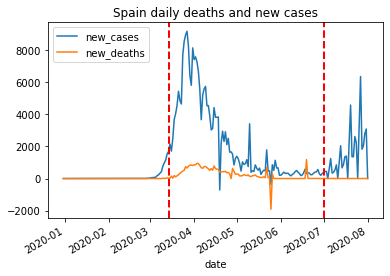

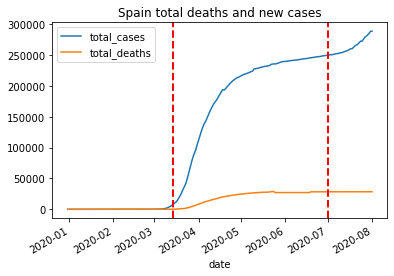

In [20]:

ax = data_spain[["new_cases", "new_deaths"]].plot()
ax.axvline(pd.to_datetime('2020-03-14'), color='r', linestyle='--', lw=2)
ax.axvline(pd.to_datetime('2020-07-01'), color='r', linestyle='--', lw=2, label="test")
plt.title("Spain daily deaths and new cases")
#plt.text(pd.to_datetime('2020-03-14'), 0.5, 'hello', horizontalalignment='center')


ax = data_spain[["total_cases", "total_deaths"]].plot()
ax.axvline(pd.to_datetime('2020-03-14'), color='r', linestyle='--', lw=2)
ax.axvline(pd.to_datetime('2020-07-01'), color='r', linestyle='--', lw=2, label="test")
plt.title("Spain total deaths and new cases")